# Fall Prep Notebook 12
## CIFAR-10 II

This notebook has a few exercises that can serve as a primer for what to expect in the `Fall Problem Session 12` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some supervised learning basic techniques that you may want a refresher on prior to starting `Fall Problem Session 12`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Loading data from `keras`

Load the MNIST of fashion data from `keras.datasets`, <a href="https://keras.io/api/datasets/fashion_mnist/">https://keras.io/api/datasets/fashion_mnist/</a>

##### Sample Solution

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### 2. Preparing data

##### a.

Scale the training and test sets so that the maximum pixel value goes to $1$ instead of $255$ and the minimum pixel values stays at $0$.

##### Sample Solution

In [4]:
X_train = X_train/255
X_test = X_test/255

##### b.

Reshape the data so it could be used to train a feed forward neural network.

##### Sample Solution

In [5]:
X_train_r = X_train.reshape(X_train.shape[0], -1)
X_test_r = X_test.reshape(X_test.shape[0], -1)

##### c.

Make a validation split.

##### Sample Solution

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_tt, X_val, y_tt, y_val = train_test_split(X_train_r, y_train,
                                               shuffle = True,
                                               random_state = 394,
                                               stratify = y_train)

#### 3. Building a feed forward network

##### a.

Import everything you need from `keras` in order to build a neural network for these data.

##### Sample Solution

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

##### b.

Build a feed forward network with a single hidden layer that is $50$ nodes deep. Call it `model1` and store the training history in `history1`. Train the model for 50 epochs.

##### Sample Solution

In [9]:
model1 = models.Sequential()

model1.add(layers.Dense(50, activation='relu', input_shape=(X_tt.shape[1],)))

model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

n_epochs = 50
history1 = model1.fit(X_tt, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(X_val,to_categorical(y_val)))

Epoch 1/50
42/88 [=============>................] - ETA: 0s - loss: 1.1417 - accuracy: 0.6380 

2022-09-19 16:23:31.211945: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-19 16:23:31.212096: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


88/88 [==============================] - 0s 2ms/step - loss: 0.9029 - accuracy: 0.7068 - val_loss: 0.6387 - val_accuracy: 0.7766
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8030 - val_loss: 0.5375 - val_accuracy: 0.8173
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.8218 - val_loss: 0.5868 - val_accuracy: 0.7837
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.8335 - val_loss: 0.4535 - val_accuracy: 0.8437
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8434 - val_loss: 0.4432 - val_accuracy: 0.8463
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8481 - val_loss: 0.4445 - val_accuracy: 0.8457
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8528 - val_loss: 0.4277 - val_accuracy: 0.8516
Epoch 8/50
88/88 [=============

##### c.

Now build a second feed forward network with three layers of $10$ nodes each. Train it for the same number of epochs. Store the model in `model2` and store the history from the fit into `history2`.

##### Sample Solution

In [10]:
model2 = models.Sequential()

model2.add(layers.Dense(10, activation='relu', input_shape=(X_tt.shape[1],)))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))



model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

n_epochs = 50
history2 = model2.fit(X_tt, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(X_val,to_categorical(y_val)))

Epoch 1/50
88/88 [==============================] - 0s 2ms/step - loss: 1.7193 - accuracy: 0.3583 - val_loss: 1.2495 - val_accuracy: 0.5147
Epoch 2/50
88/88 [==============================] - 0s 1ms/step - loss: 1.0010 - accuracy: 0.6316 - val_loss: 0.8377 - val_accuracy: 0.7144
Epoch 3/50
88/88 [==============================] - 0s 1ms/step - loss: 0.7567 - accuracy: 0.7425 - val_loss: 0.7211 - val_accuracy: 0.7453
Epoch 4/50
88/88 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.7694 - val_loss: 0.6540 - val_accuracy: 0.7632
Epoch 5/50
88/88 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.7888 - val_loss: 0.5905 - val_accuracy: 0.7914
Epoch 6/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.8030 - val_loss: 0.5621 - val_accuracy: 0.8036
Epoch 7/50
88/88 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.8121 - val_loss: 0.5532 - val_accuracy: 0.7992
Epoch 8/50
88/88 [==

##### d.

Plot the validation set accuracies for both of these models in the same plot. Which one seems to perform better?

##### Sample Solution

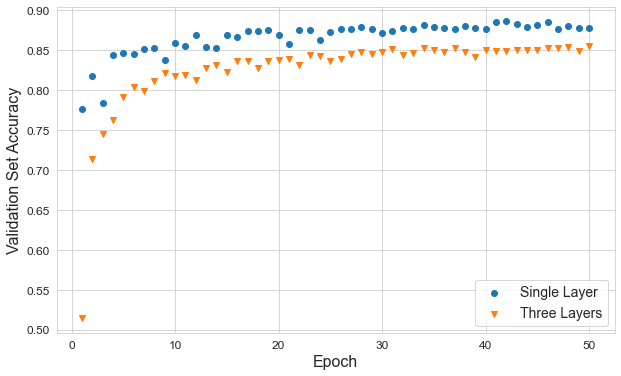

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(range(1, n_epochs+1),
                history1.history['val_accuracy'],
                label="Single Layer")
plt.scatter(range(1, n_epochs+1),
                history2.history['val_accuracy'],
                marker='v',
                label="Three Layers")

plt.legend(fontsize=14)

plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Validation Set Accuracy", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)